In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from tqdm import tqdm

In [ ]:
data_path = r'./data/'

walk_dataframes, run_dataframes = [], []

for csv_file in os.listdir(data_path):
    print(f"File: {csv_file}")
    df = pd.read_csv(data_path + csv_file, skiprows=5)
    df.name = csv_file
    if 'walk' in csv_file:
        walk_dataframes.append(df)
    else:
        run_dataframes.append(df)

In [35]:
for lst in [walk_dataframes, run_dataframes]:
    for dataframe in lst:
        if 'ACC Y' not in dataframe.columns:
            print(dataframe.name)

11_walk_1_1.csv
11_walk_2_1.csv
11_walk_3_1.csv
11_walk_5_1.csv
6_walk_5_1.csv
6_run_3_1.csv
6_run_4_1.csv


In [33]:
walk_dataframes[0]

,Time [sec],ACC X,ACC Y,ACC Z
0,0.000000,-9.53,2.16,0.20
1,0.049927,-10.28,2.43,0.35
2,0.099976,-10.24,2.39,-0.75
3,0.149902,-10.12,1.73,-0.63
4,0.209961,-10.12,4.47,-0.82
...,...,...,...,...
342,17.439941,-9.45,4.63,0.51
343,17.500000,-9.30,4.63,0.55
344,17.549927,-9.45,4.59,0.59
345,17.599976,-9.30,4.59,0.59


We start by cleaning the data, since it contains **a lot** of garbage.
We go over each file and plot 3 lines in the same plot: Time vs ACC X, Time vs ACC Y, Time vs ACC Z:

In [30]:
errors = []

for lst in [walk_dataframes, run_dataframes]:
    for dataframe in lst:
        try:
            plt.plot(dataframe['Time [sec]'], dataframe['ACC X'])
            plt.plot(dataframe['Time [sec]'], dataframe['ACC Y'])
            plt.plot(dataframe['Time [sec]'], dataframe['ACC Z'])
            plt.legend(['X', 'Y', 'Z'])
            plt.title(f"File name: {dataframe.name}")
            plt.show()
        except:
            errors.append(dataframe.name)
    print('\n')

print(f"Errors: {errors}")





Errors: ['5_walk_1_1.csv', '5_walk_2_1.csv', '5_walk_3_1.csv', '5_walk_4_2.csv', '5_walk_5_2.csv', '5_run_1_1.csv', '5_run_2_1.csv', '5_run_3_1.csv', '5_run_4_1.csv', '5_run_5_1.csv']


In [ ]:
from random import randint

for _ in range(3):
    i = randint(0, 127)
    print(i)
    plt.plot(walk_dataframes[i]['Time [sec]'], walk_dataframes[i]['ACC X'])
    plt.plot(walk_dataframes[i]['Time [sec]'], walk_dataframes[i]['ACC Y'])
    plt.plot(walk_dataframes[i]['Time [sec]'], walk_dataframes[i]['ACC Z'])
    plt.legend(['X', 'Y', 'Z'])
    plt.title(f"File name: {walk_dataframes[i].name}")
    plt.show()
# plt.figure(figsize=(20, 20))

In [ ]:
walk_dataframes[112].name

In [ ]:
for idx, row in walk_dataframes[9].iterrows():
    print(idx)
    print(row)
    print('\n')

In [32]:
walk_dataframes[5].name

'11_walk_1_1.csv'

In [36]:
data_path = r'./data/'

walk_dataframes_5, run_dataframes_5 = [], []

for csv_file in os.listdir(data_path):
    if csv_file.startswith('5'):
        print(f"File: {csv_file}")
        df = pd.read_csv(data_path + csv_file, skiprows=5)
        df.name = csv_file
        if 'walk' in csv_file:
            walk_dataframes_5.append(df)
        else:
            run_dataframes_5.append(df)

File: 5_run_1_1.csv
File: 5_run_2_1.csv
File: 5_run_3_1.csv
File: 5_run_4_1.csv
File: 5_run_5_1.csv
File: 5_walk_1_1.csv
File: 5_walk_2_1.csv
File: 5_walk_3_1.csv
File: 5_walk_4_2.csv
File: 5_walk_5_2.csv


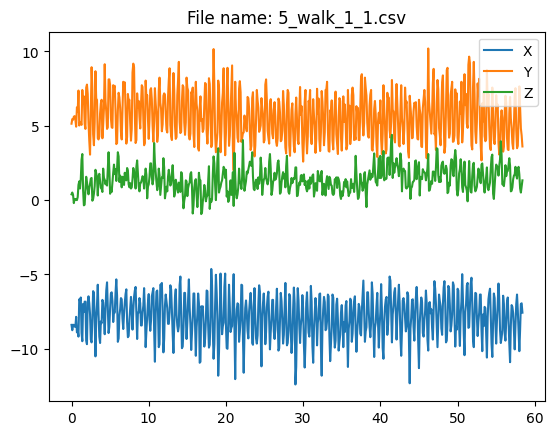

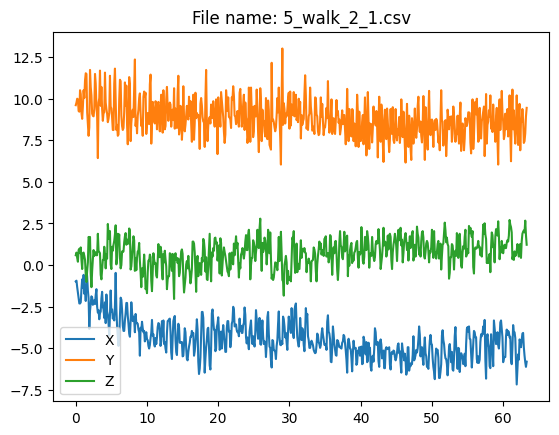

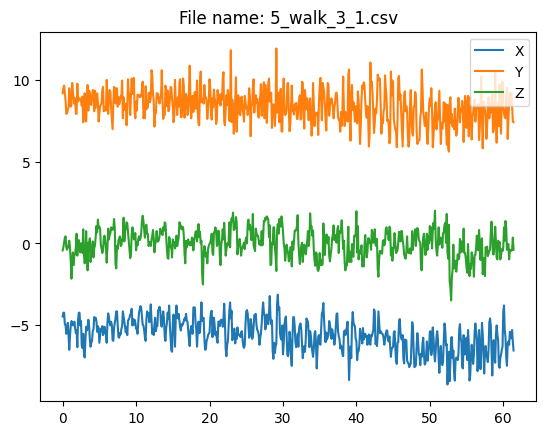

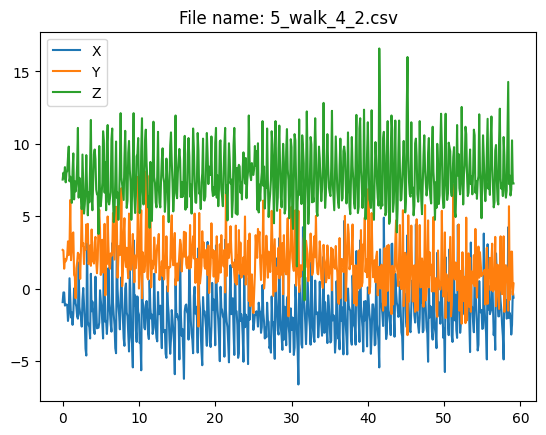

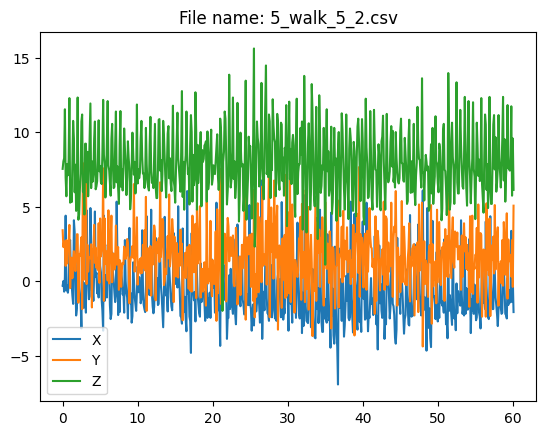

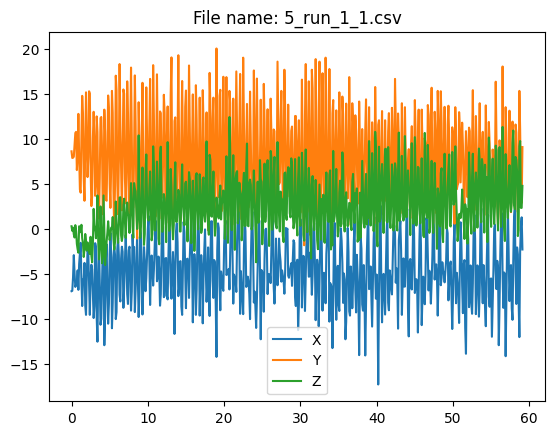

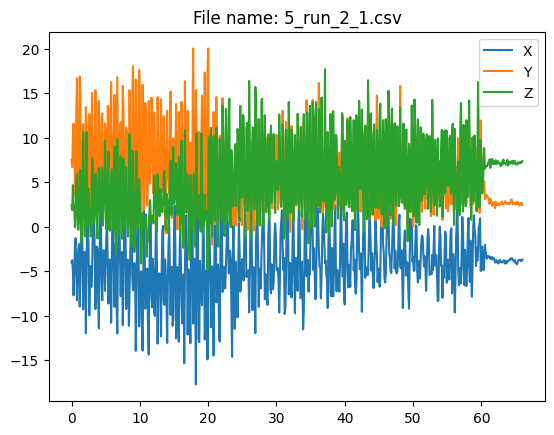

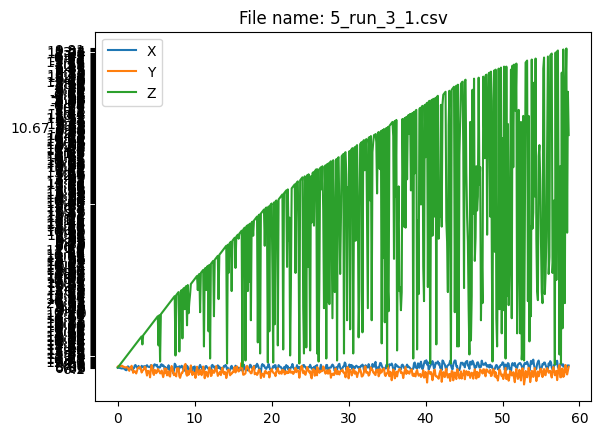

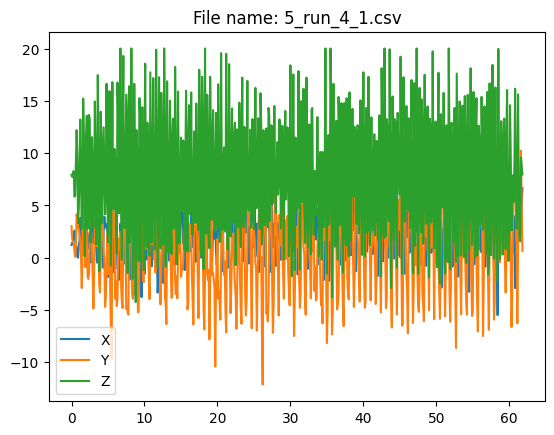

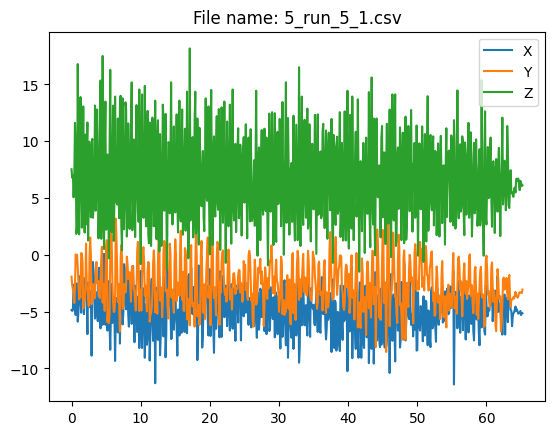

In [42]:
for i in range(5):
    plt.plot(walk_dataframes_5[i]['Time[sec]'], walk_dataframes_5[i]['ACC X'])
    plt.plot(walk_dataframes_5[i]['Time[sec]'], walk_dataframes_5[i]['ACC Y'])
    plt.plot(walk_dataframes_5[i]['Time[sec]'], walk_dataframes_5[i]['ACC Z'])
    plt.legend(['X', 'Y', 'Z'])
    plt.title(f"File name: {walk_dataframes_5[i].name}")
    plt.show()

for i in range(5):
    plt.plot(run_dataframes_5[i]['Time[sec]'], run_dataframes_5[i]['ACC X'])
    plt.plot(run_dataframes_5[i]['Time[sec]'], run_dataframes_5[i]['ACC Y'])
    plt.plot(run_dataframes_5[i]['Time[sec]'], run_dataframes_5[i]['ACC Z'])
    plt.legend(['X', 'Y', 'Z'])
    plt.title(f"File name: {run_dataframes_5[i].name}")
    plt.show()